In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

/home/chinen/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
x = np.array([-2.5,  -2, -1.76,  -1, -0.2, 0.5, 0.8, 1.0, 1.1])
y = np.array([4.21, 2.5,  1.4, 1.37, 2.29, 2.4, 3.98, 1.2, 0.99])

**Exercício 1:** Faça regressões lineares sobre esses dados, utilizando as seguintes configurações:

- Uma reta
- Um polinômio de grau 2 com penalidade Lasso
- A regressão que achar mais adequada.

Visualize as três regressões.

Existem pontos nesse conjunto que você consideraria um _outlier_?

Considere a base de dados Wine, contém a classificação de vinhos de acordo com algumas propriedades numéricas, presente no pacote `sklearn.datasets`.

**Exercício 2:**

1. Separe os dados da base Wine entre treino e teste, com 60% dos dados para treino e 40% para teste
2. Crie uma árvore de classificação utilizando os dados de treino, com altura máxima 4
3. Visualize as regras da árvore treinada
4. Calcule a matriz de confusão do modelo


In [6]:
df = pd.DataFrame(load_wine().data, columns=load_wine().feature_names)
df['target'] = load_wine().target

R^2: 0.09056137577324885
Pearson ao quadrado: [0.09056138]
Média do erro absoluto: 0.8761146343725219
Erro quadrático médio: 1.1223685207790413


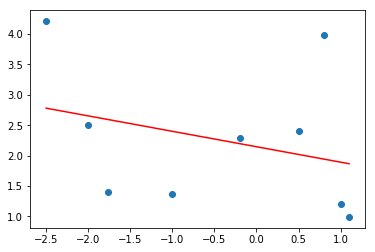

In [30]:
# Exercicio 1
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Ajustando x
x1 = x.reshape(-1,1)

# Chamando a função de regressão linear e inserindo x e y para ajuste
regressorlinear = LinearRegression()
regressorlinear.fit(x1,y)

y0 = regressorlinear.intercept_
m = regressorlinear.coef_[0]

# Plotando no gráfico as tuplas (x, y)
plt.scatter(x1, y)

# Criando um array para os a predição dos valores
linha = np.linspace(x.min(),x.max(),100).reshape(-1, 1)
#plt.title("Reta : Regressão linear simples")
plt.plot(linha, regressorlinear.predict(linha), c='r')

predito = regressorlinear.predict(x1)
print("R^2: "+str(r2_score(y, predito)))

print("Pearson ao quadrado:",str(pearsonr(x, y)[0] ** 2))

print("Média do erro absoluto:",str(mean_absolute_error(y, predito)))

print("Erro quadrático médio:",str(mean_squared_error(y,predito)))

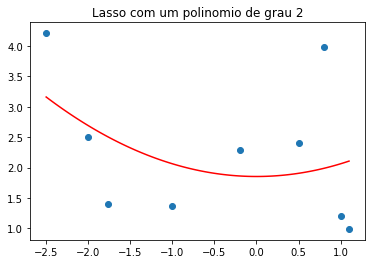

In [38]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# LASSO

# Ajustando a entrada x1 para ter grau 2
x1 = x.reshape(-1,1) ** (np.arange(2)+1)

#Chamando a função Lasso
regressorlasso = Lasso(alpha = 0.1)
regressorlasso.fit(x1, y)

# Plotando a tupla(x, y)
plt.scatter(x, y)

# Criando o array com as informações para a predição
ent = np.linspace(x.min(), x.max(), 100)

entradagrafico = ent.reshape(-1, 1) ** (np.arange(2)+1)

curva = regressorlasso.predict(entradagrafico)

plt.title("Lasso com um polinomio de grau 2")
plt.plot(ent, regressorlasso.predict(entradagrafico), c='red')

R^2: 0.0902349405969034
Pearson ao quadrado: [0.09056138]
Média do erro absoluto: 0.8747468882472965
Erro quadrático médio: 1.1227713853113417


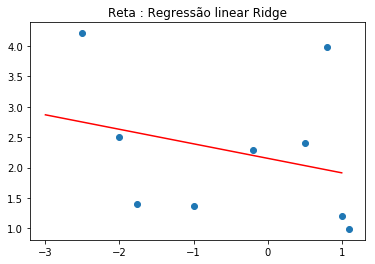

In [11]:
#Regressao de Ridge

from sklearn.linear_model import Ridge

x = np.array([-2.5,  -2, -1.76,  -1, -0.2, 0.5, 0.8, 1.0, 1.1]).reshape(-1,1)
y = np.array([4.21, 2.5,  1.4, 1.37, 2.29, 2.4, 3.98, 1.2, 0.99]).reshape(-1,1)

regressao = Ridge(alpha = 1.0)
regressao.fit(x, y)
y0 = regressao.intercept_
m = regressao.coef_[0]

plt.scatter(x, y)

linha = np.linspace(-3,1,2).reshape(-1,1)
plt.title("Reta : Regressão linear Ridge")
plt.plot(linha, regressao.predict(linha), c='r')

predito = regressao.predict(x)
print("R^2: "+str(r2_score(y, predito)))

print("Pearson ao quadrado:",str(pearsonr(x, y)[0] ** 2))

print("Média do erro absoluto:",str(mean_absolute_error(y, predito)))

print("Erro quadrático médio:",str(mean_squared_error(y,predito)))

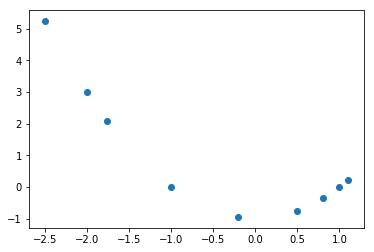

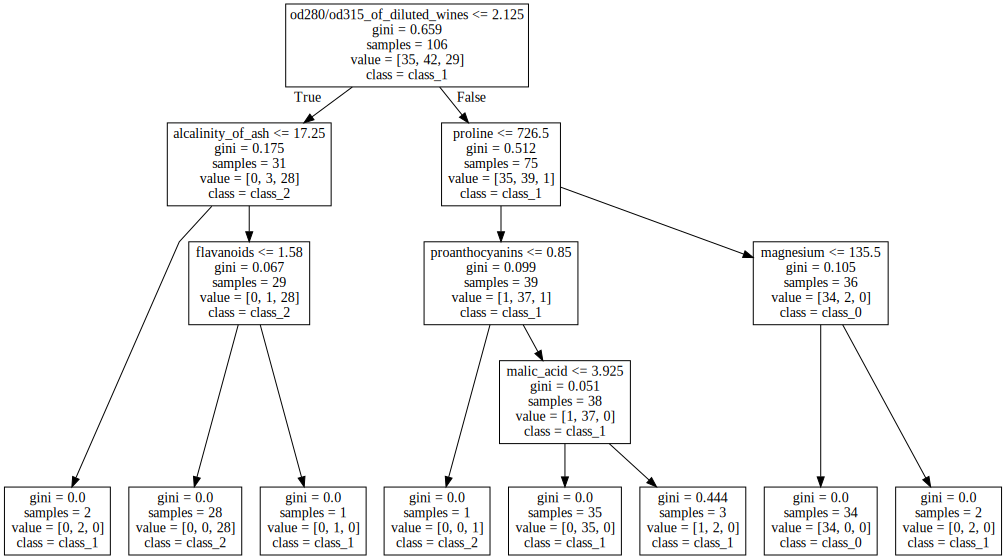

In [13]:
# Exercicio 2
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
# Definindo 'target' como categórico
df['target'] = pd.Categorical(df['target'])

# Dividindo as amostras em 60% treinamento e 40% teste
train, test = train_test_split(df, stratify = df['target'], train_size=0.6, test_size=0.4)

# Criando a árvore com profundidade máxima = 4
clf = tree.DecisionTreeClassifier(max_depth=4)

# Obtendo os dados sem a coluna 'target'
train_data = train.drop(columns=['target'])

clf = clf.fit(train_data, train['target'])

dot_data = tree.export_graphviz(clf, out_file=None,
                                class_names=list(load_wine().target_names),
                                feature_names=list(load_wine().feature_names),
                                leaves_parallel=True)
graphviz.Source(dot_data)

In [16]:
#Matriz de confusão
from sklearn import metrics

expected = test['target']

predicted = clf.predict(test.drop(columns=['target']))

metrics.confusion_matrix(expected, predicted)

df = pd.DataFrame(metrics.confusion_matrix(expected, predicted),
                  columns=['Predicted A', 'Predicted B', 'Predicted C'],
                  index=['True A', 'True B', 'True C'])
print(df)

        Predicted A  Predicted B  Predicted C
True A           24            0            0
True B            1           25            3
True C            1            0           18
